**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   EQUIPO: 72

*   NOMBRES Y MATRÍCULAS:
                          Aarón Cortés García A01730451
                          Héctor Segura Quintanilla A01154108
                          José Emilio Malagón Martínez A01794972
                          Oskar Abraham Guarneros Vázquez A01795329

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y analítica de datos/Semana 6"
# os.chdir(DIR)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [6]:
cars_df = cars_df.drop(['id', 'VIN', 'url', 'image_url', 'description', 'posting_date'], axis = 1)

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

***Hay un total de 426,880 registros en el dataframe, con un total de 20 columnas luego de eliminar las innecesarias.***

In [7]:
number_of_records = len(cars_df)
print('Cantidad de registros en el dataframe: ' + str(number_of_records))

number_of_columns = len(cars_df.columns)
print('Cantidad de columnas en el dataframe: ' + str(number_of_columns))

Cantidad de registros en el dataframe: 426880
Cantidad de columnas en el dataframe: 20


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ningún método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?

***Se eliminaron 6 columnas por tener el 30% o más de valores faltantes.***


In [8]:
cars_df = cars_df.dropna(axis = 1, thresh = 0.70 * number_of_records)
print('Cantidad de columnas eliminadas del dataframe: ' + str(number_of_columns - len(cars_df.columns)))

Cantidad de columnas eliminadas del dataframe: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?

***Se eliminó el 10.16% de los registros.***


In [9]:
cars_df = cars_df.dropna(subset = [column for column in cars_df.columns if cars_df[column].isna().sum() < 0.05 * len(cars_df)])
print('Porcentaje de registros eliminados del dataframe: ' + str(round((number_of_records - len(cars_df)) * 100 / number_of_records, 2)))

Porcentaje de registros eliminados del dataframe: 10.16


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [10]:
for column in cars_df.columns:
    if pd.api.types.is_numeric_dtype(cars_df[column]):
        skew = cars_df[column].skew()
        if abs(skew) < 0.15:
            # Imputar usando la media si se trata de una variable numérica relativamente simétrica
            cars_df[column] = cars_df[column].fillna(cars_df[column].mean())
        else:
            # Imputar usando la mediana si se trata de una variable numérica sesgada
            cars_df[column] = cars_df[column].fillna(cars_df[column].median())
    else:
        # Imputar usando la moda para si se trata de una variable categórica
        cars_df[column] = cars_df[column].fillna(cars_df[column].mode().iloc[0])

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

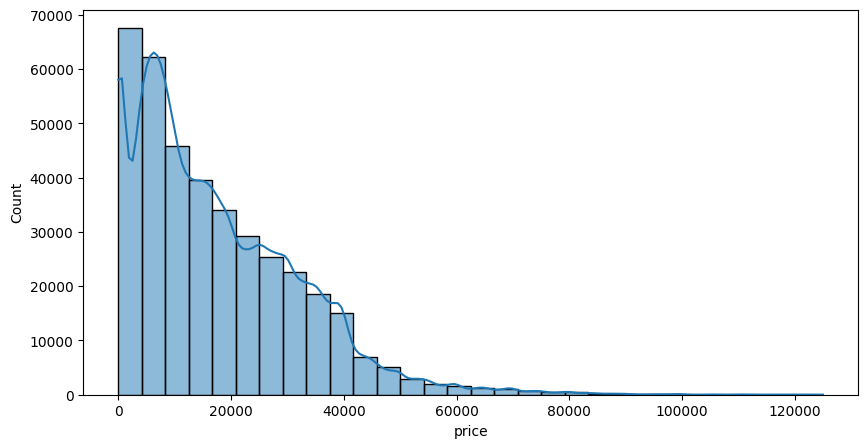

In [11]:
#Filtración de datos válidos menores a 125,000 para evitar que esos valores atípicos afecten severamente la visualización del histograma
valid_price_values = cars_df[cars_df["price"] < 125000]
plt.figure(figsize = (10, 5))
sns.histplot(data = cars_df, x = valid_price_values.price, bins = 30, kde = True)
plt.show()

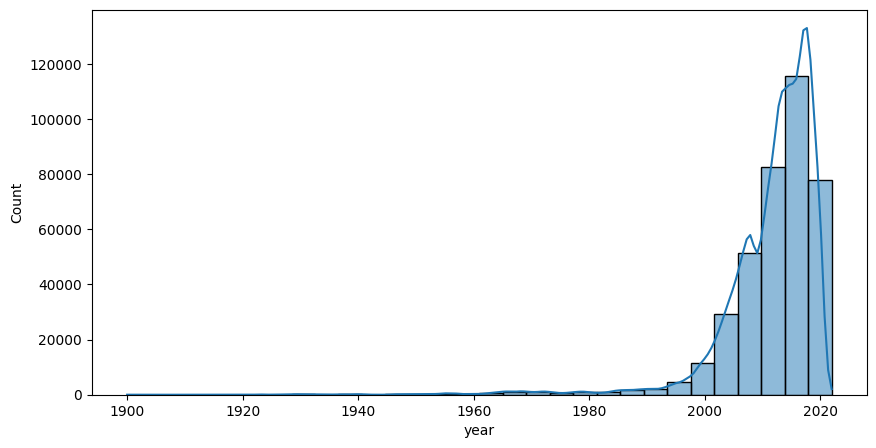

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data = cars_df, x = cars_df['year'], bins = 30, kde = True)
plt.show()

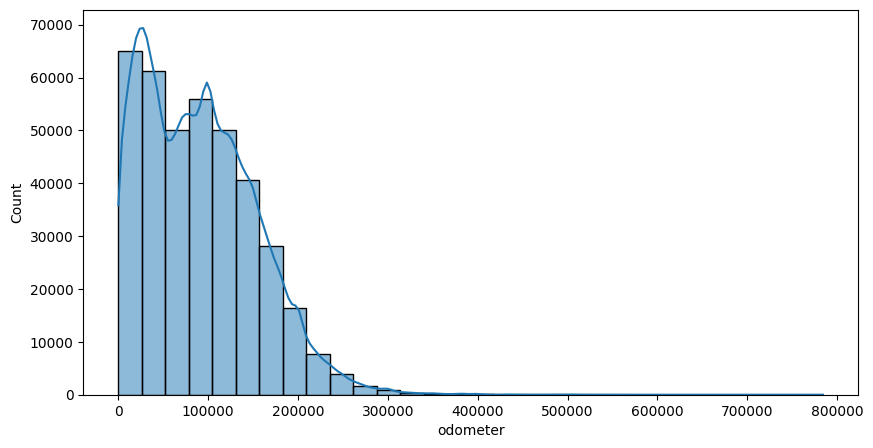

In [13]:
#Filtración de datos válidos menores a 800,000 para evitar que los valores atípicos afecten severamente la visualización del histograma
valid_odometer_values = cars_df[cars_df["odometer"] < 800000]
plt.figure(figsize=(10, 5))
sns.histplot(data = cars_df, x = valid_odometer_values.odometer, bins = 30, kde = True)
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

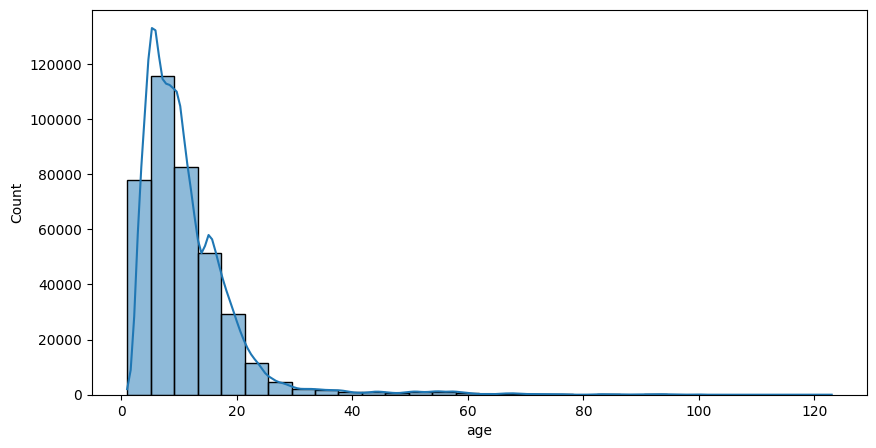

In [14]:
cars_df['age'] = pd.Timestamp.now().year - cars_df['year']
cars_df = cars_df.drop(columns=['year'])

plt.figure(figsize=(10, 5))
sns.histplot(data = cars_df, x = cars_df['age'], bins = 30, kde=True)
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

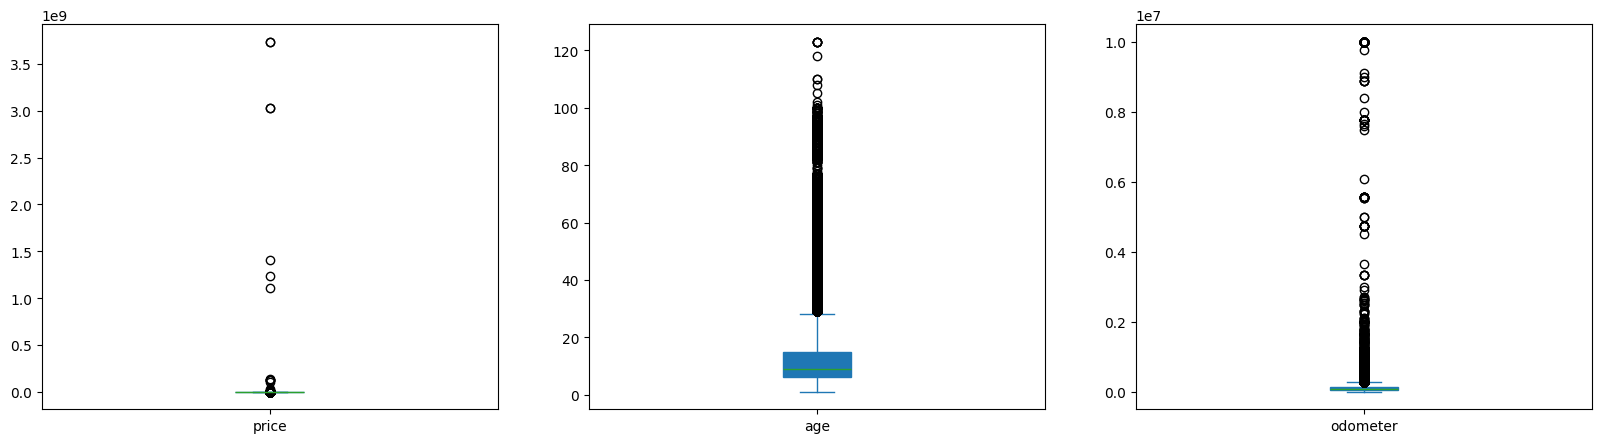

In [15]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust()
axes = axes.ravel()
box_cols = cars_df[['price', 'age', 'odometer']]
for col, ax in zip(box_cols, axes):
    cars_df[col].plot(kind='box', ax=ax, patch_artist=True)

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [16]:
box_cols = cars_df[['price', 'age', 'odometer']] # Se crea una variable con las tres que nos interesan

for col in box_cols:
    Q1 = cars_df[col].quantile(0.25)
    Q3 = cars_df[col].quantile(0.75)
    IQR = Q3-Q1
    BM = cars_df[(cars_df[col] > (Q3+1.5 *IQR)) | (cars_df[col] < (Q1-1.5 *IQR))] # Se crea la máscara que para detectar outliers
    cars_df = cars_df[~cars_df.index.isin(BM.index)] # Se descartan los outliers en el df para cada una de las tres variables
    print(f'El porcentaje de outliers en la columna {col} es:',round((len(BM)/len(cars_df[col]))* 100,2), '%')

El porcentaje de outliers en la columna price es: 1.67 %
El porcentaje de outliers en la columna age es: 3.21 %
El porcentaje de outliers en la columna odometer es: 0.74 %


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

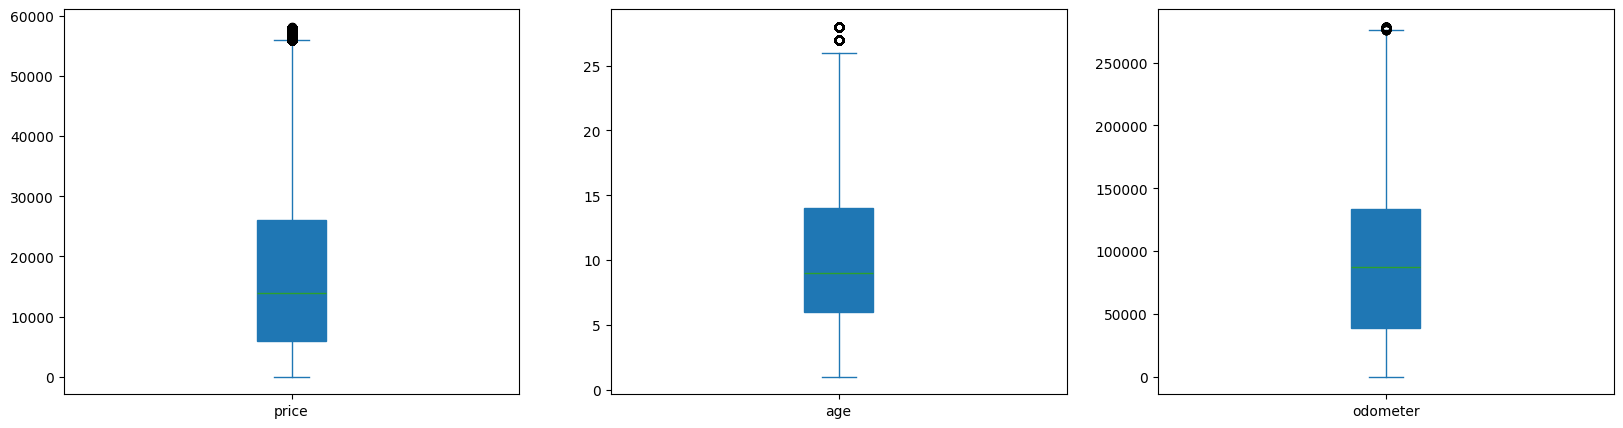

In [17]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust()
axes = axes.ravel()
box_cols = cars_df[['price', 'age', 'odometer']]
for col, ax in zip(box_cols, axes):
    cars_df[col].plot(kind='box', ax=ax, patch_artist=True)

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


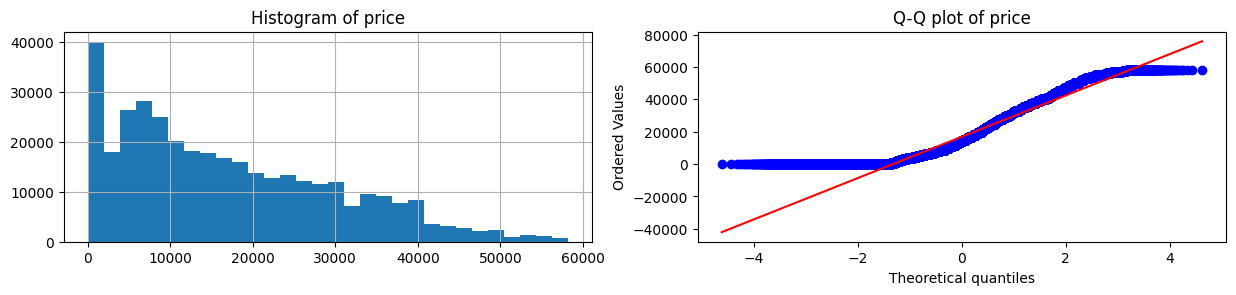

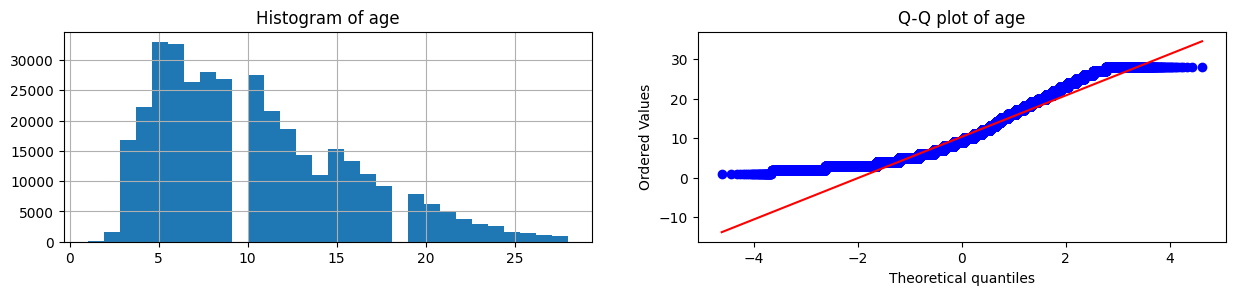

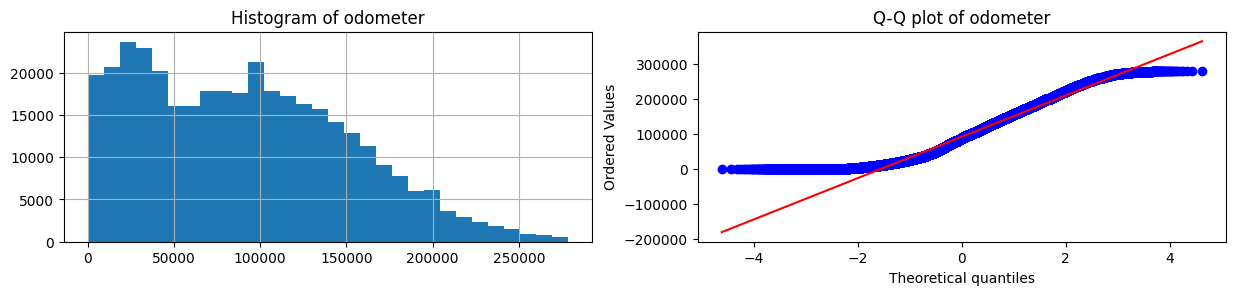

In [18]:
vars = cars_df[['price', 'age', 'odometer']]
# yeo_vars.head()
variables = list(vars.columns)


def diagnostic_plots(df, variable):

    plt.figure(figsize=(15,6))

    plt.subplot(2, 2, 1)

    df[variable].hist(bins=30)

    plt.title(f"Histogram of {variable}")

    plt.subplot(2, 2, 2)

    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.title(f"Q-Q plot of {variable}")

    plt.show()

diagnostic_plots(vars, 'price')
diagnostic_plots(vars, 'age')
diagnostic_plots(vars, 'odometer')


Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [19]:
from sklearn.preprocessing import PowerTransformer

# Copia del dataframe original
trans_df = cars_df.copy()

# Variables a transformar
yeo_vars = trans_df[['price', 'age', 'odometer']]

# Inicialización y ajuste del transformador
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transformer.fit(yeo_vars)

# Transformación de las columnas seleccionadas
transformed_data = transformer.transform(yeo_vars)

# Convertir los datos transformados en un DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=yeo_vars.columns, index=trans_df.index)

# Reemplazar las columnas originales con las columnas transformadas
trans_df[yeo_vars.columns] = transformed_df

trans_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
27,auburn,https://auburn.craigslist.org,200.648218,gmc,sierra 1500 crew cab slt,gas,629.785377,clean,other,pickup,al,32.590000,-85.480000,2.548500
28,auburn,https://auburn.craigslist.org,168.918413,chevrolet,silverado 1500,gas,702.965871,clean,other,pickup,al,32.590000,-85.480000,2.965365
29,auburn,https://auburn.craigslist.org,215.457009,chevrolet,silverado 1500 crew,gas,349.514589,clean,other,pickup,al,32.590000,-85.480000,1.473041
30,auburn,https://auburn.craigslist.org,193.761084,toyota,tundra double cab sr,gas,524.901169,clean,other,pickup,al,32.590000,-85.480000,2.119684
31,auburn,https://auburn.craigslist.org,141.362733,ford,f-150 xlt,gas,959.812276,clean,automatic,truck,al,32.592000,-85.518900,2.665350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,172.126351,nissan,maxima s sedan 4d,gas,461.031291,clean,other,sedan,wy,33.786500,-84.445400,1.727132
426876,wyoming,https://wyoming.craigslist.org,192.672583,volvo,s60 t5 momentum sedan 4d,gas,272.674665,clean,other,sedan,wy,33.786500,-84.445400,1.473041
426877,wyoming,https://wyoming.craigslist.org,204.230823,cadillac,xt4 sport suv 4d,diesel,154.786328,clean,other,hatchback,wy,33.779214,-84.411811,1.473041
426878,wyoming,https://wyoming.craigslist.org,188.235191,lexus,es 350 sedan 4d,gas,444.677381,clean,other,sedan,wy,33.786500,-84.445400,1.938419


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

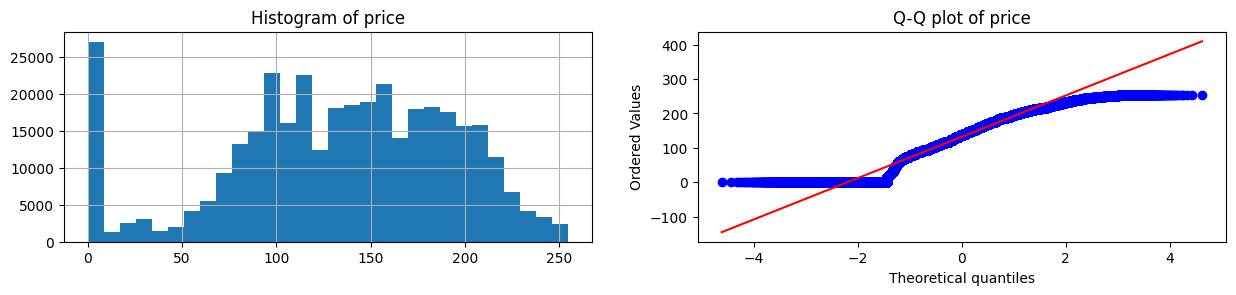

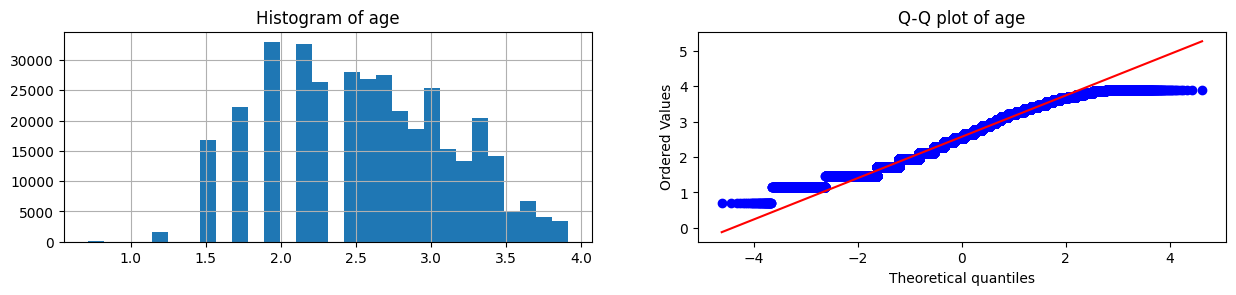

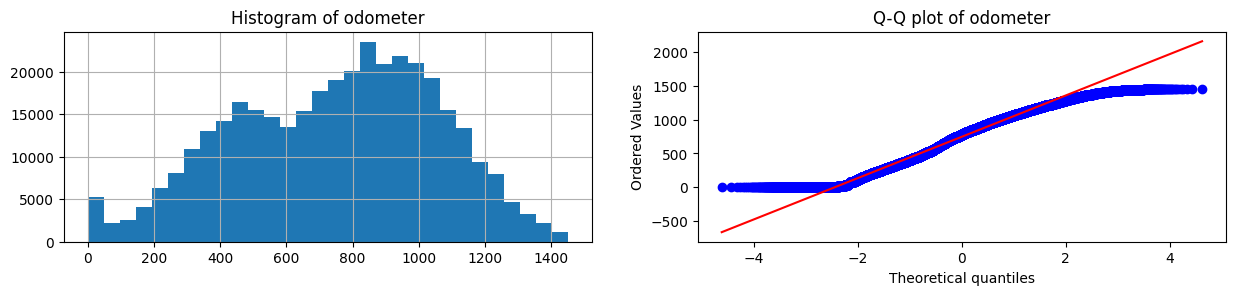

In [20]:
diagnostic_plots(trans_df, 'price')
diagnostic_plots(trans_df, 'age')
diagnostic_plots(trans_df, 'odometer')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [21]:
from sklearn import preprocessing

# Variables a escalar
trans_vars = trans_df[['price', 'age', 'odometer']]

# Inicialización y ajuste del escalador
minmax_scale = preprocessing.MinMaxScaler().fit(trans_vars)

# Transformación de las columnas seleccionadas
minmax_data = minmax_scale.transform(trans_vars)

# Convertir los datos escalados en un DataFrame temporal
temp_df = pd.DataFrame(minmax_data, columns=trans_vars.columns, index=trans_df.index)

# Actualizar las columnas originales con los datos escalados

minmax_df = trans_df.copy()
minmax_df [['price', 'age', 'odometer']] = temp_df[['price', 'age', 'odometer']]

minmax_df


,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
27,auburn,https://auburn.craigslist.org,0.788279,gmc,sierra 1500 crew cab slt,gas,0.434239,clean,other,pickup,al,32.590000,-85.480000,0.573885
28,auburn,https://auburn.craigslist.org,0.663623,chevrolet,silverado 1500,gas,0.484697,clean,other,pickup,al,32.590000,-85.480000,0.704320
29,auburn,https://auburn.craigslist.org,0.846457,chevrolet,silverado 1500 crew,gas,0.240991,clean,other,pickup,al,32.590000,-85.480000,0.237377
30,auburn,https://auburn.craigslist.org,0.761222,toyota,tundra double cab sr,gas,0.361921,clean,other,pickup,al,32.590000,-85.480000,0.439710
31,auburn,https://auburn.craigslist.org,0.555366,ford,f-150 xlt,gas,0.661793,clean,automatic,truck,al,32.592000,-85.518900,0.610447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,0.676226,nissan,maxima s sedan 4d,gas,0.317882,clean,other,sedan,wy,33.786500,-84.445400,0.316881
426876,wyoming,https://wyoming.craigslist.org,0.756945,volvo,s60 t5 momentum sedan 4d,gas,0.188010,clean,other,sedan,wy,33.786500,-84.445400,0.237377
426877,wyoming,https://wyoming.craigslist.org,0.802354,cadillac,xt4 sport suv 4d,diesel,0.106726,clean,other,hatchback,wy,33.779214,-84.411811,0.237377
426878,wyoming,https://wyoming.craigslist.org,0.739512,lexus,es 350 sedan 4d,gas,0.306606,clean,other,sedan,wy,33.786500,-84.445400,0.382992


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

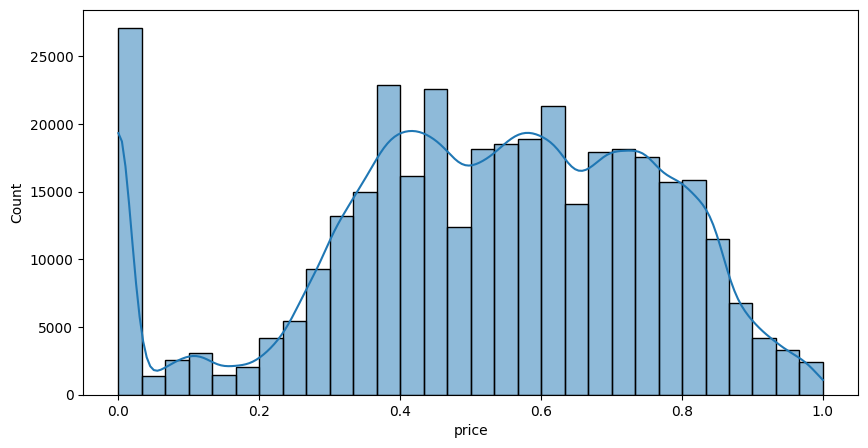

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data = minmax_df, x = minmax_df['price'], bins = 30, kde=True)
plt.show()

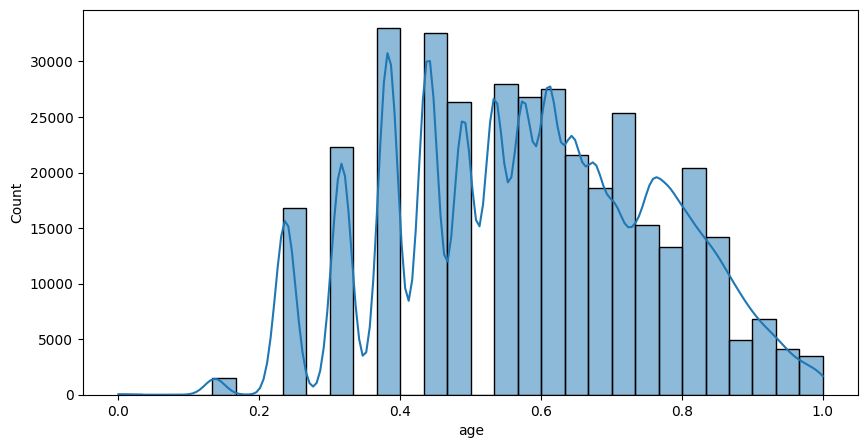

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(data = minmax_df, x = minmax_df['age'], bins = 30, kde=True)
plt.show()

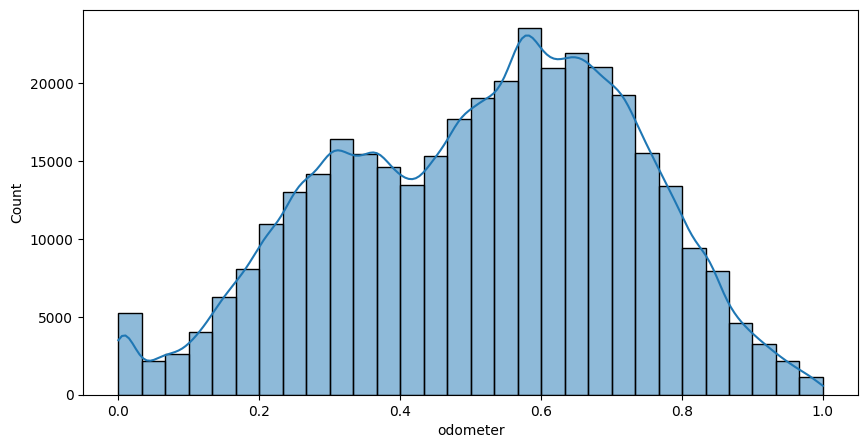

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(data = minmax_df, x = minmax_df['odometer'], bins = 30, kde=True)
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [25]:
cars_df.describe(include='object').T

,count,unique,top,freq
region,362777,404,columbus,3015
region_url,362777,413,https://grandrapids.craigslist.org,2743
manufacturer,362777,40,ford,61190
model,362777,19265,f-150,7198
fuel,362777,5,gas,309295
title_status,362777,6,clean,351115
transmission,362777,3,automatic,288255
type,362777,13,sedan,153769
state,362777,51,ca,42325


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [26]:
categorical_variables = cars_df.select_dtypes(include=['object'])
highly_cardinal_variables = []
few_cardinal_variables = []

umbral_cardinalidad = 100

for column in categorical_variables.columns:
    if cars_df[column].nunique() > umbral_cardinalidad:
        highly_cardinal_variables.append(column)
    else:
        few_cardinal_variables.append(column)

print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

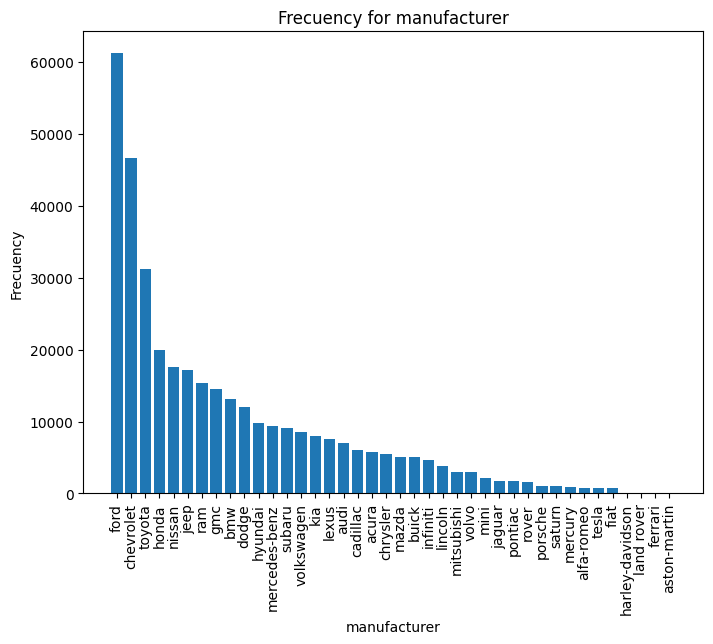

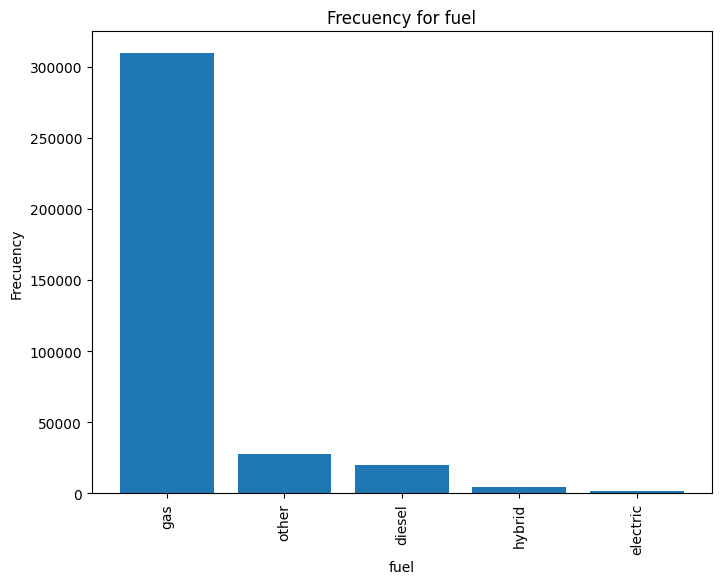

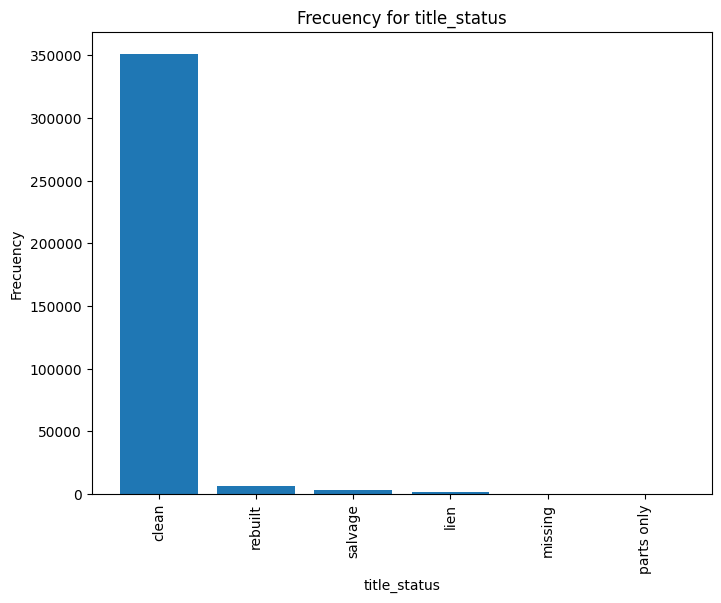

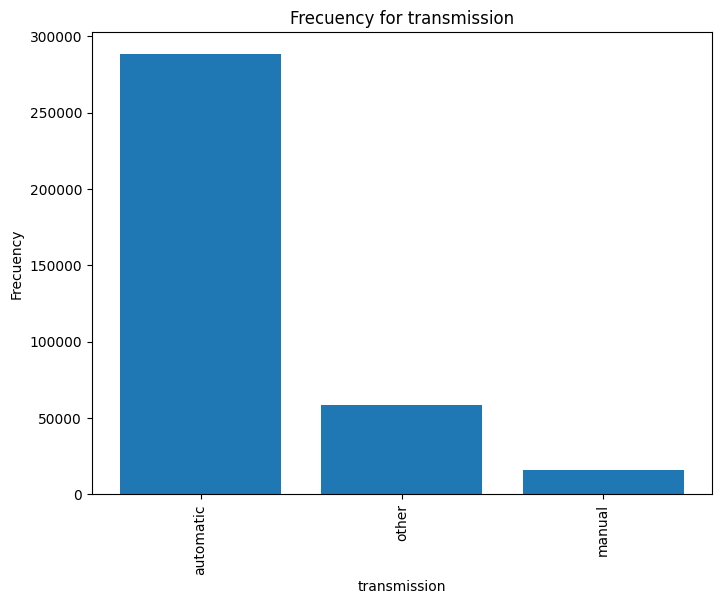

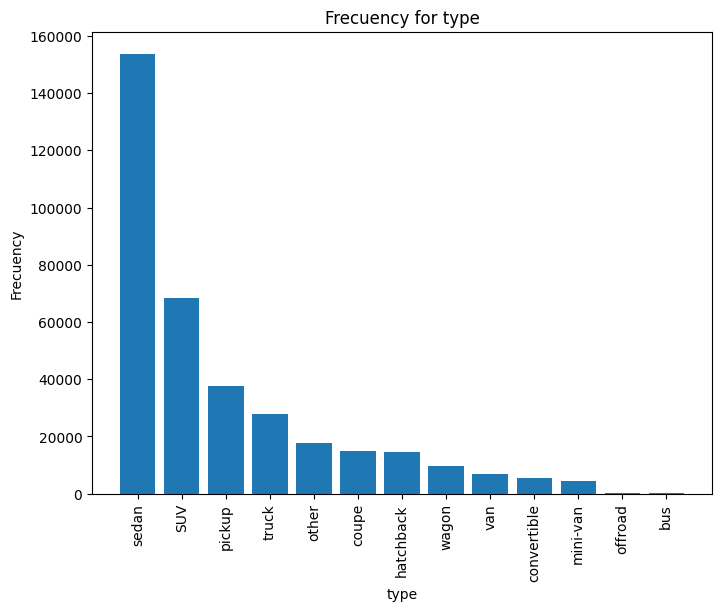

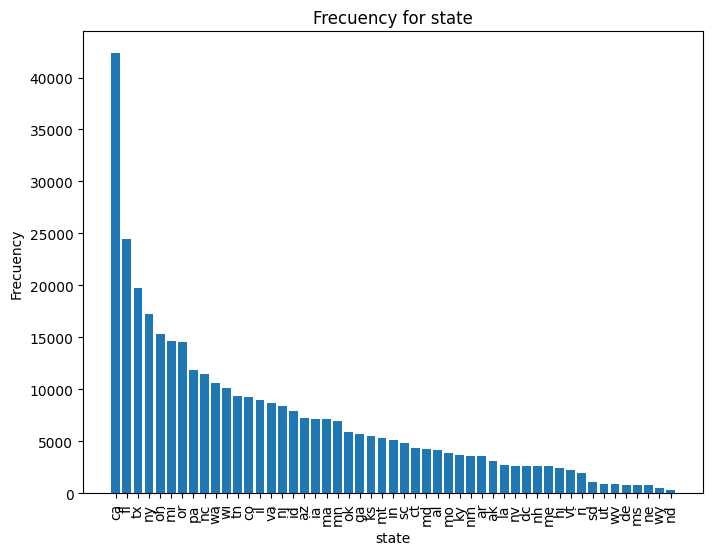

In [38]:
for column in few_cardinal_variables:

    frecuency = cars_df[column].value_counts()

    plt.figure(figsize=(8, 6))
    plt.bar(frecuency.index, frecuency.values)
    plt.title(f'Frecuency for {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuency')
    plt.xticks(rotation = 90)

    plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [28]:
cars_df.shape

(362777, 14)

In [29]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
few_cardinal_variables_encoded = one_hot_encoder.fit_transform(cars_df[few_cardinal_variables])
few_cardinal_variables_encoded_df = pd.DataFrame(few_cardinal_variables_encoded)
few_cardinal_variables_encoded_df.columns = one_hot_encoder.get_feature_names_out()
few_cardinal_variables_encoded_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [30]:
#!pip install category_encoders
from category_encoders.binary import BinaryEncoder

encoder = BinaryEncoder()
cardinalUP_df = encoder.fit_transform(cars_df[highly_cardinal_variables])
cardinalUP_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,1
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,0


10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [31]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
cardinal_ar = encoder.fit_transform(cars_df[few_cardinal_variables])
cardinal_df = pd.DataFrame(cardinal_ar, columns=encoder.get_feature_names_out())
cardinal_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
print(minmax_df.shape)
print(cardinal_df.shape)
print(cardinalUP_df.shape)

(362777, 14)
(362777, 112)
(362777, 33)


In [33]:
#reestablecemos los index
minmax_df.reset_index(drop=True, inplace=True)
cardinal_df.reset_index(drop=True, inplace=True)
cardinalUP_df.reset_index(drop=True, inplace=True)

In [34]:
#concatenamos los df
combined_df = pd.concat([minmax_df, cardinal_df, cardinalUP_df], axis=1)

In [35]:
#recorremos las variables categorícas y las eliminamos
for col in categorical_variables.columns:
    if col in combined_df.columns:
        combined_df.drop(col, axis=1, inplace=True)

#combined_df.head()
combined_df

,price,odometer,lat,long,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.788279,0.434239,32.590000,-85.480000,0.573885,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.663623,0.484697,32.590000,-85.480000,0.704320,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.846457,0.240991,32.590000,-85.480000,0.237377,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
3,0.761222,0.361921,32.590000,-85.480000,0.439710,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.555366,0.661793,32.592000,-85.518900,0.610447,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.676226,0.317882,33.786500,-84.445400,0.316881,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,1
362773,0.756945,0.188010,33.786500,-84.445400,0.237377,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
362774,0.802354,0.106726,33.779214,-84.411811,0.237377,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,1
362775,0.739512,0.306606,33.786500,-84.445400,0.382992,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,0
